# Coursework Final Project
## Importing and cleaning dataset
#### Importing relevant packages

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve

#### Importing Data

In [61]:
# Sampled_data.csv was optained from an independent R code in order to work with the same data for both scripts
flights = pd.read_csv("sampled_data.csv") 
planes = pd.read_csv('plane-data.csv')
airports = pd.read_csv('airports.csv')

#### Classifying delays and inspecting dataframe

In [62]:
# Delays where considered all arrival delays >= than 15 minutes
flights["Delayeds"] = np.where(flights["ArrDelay"] >= 15,"Delayed","Ontime")
flights["Delayed"] = np.where(flights["ArrDelay"] >= 15,1,0)
flights["Pre_Delay"] = np.where(flights["LateAircraftDelay"] >=15,1,0)
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayeds,Delayed,Pre_Delay
0,2006,11,6,1,926.0,925,1048.0,1114,NW,152,...,NaN,0,0,0,0,0,0,Ontime,0,0
1,2005,12,26,1,741.0,740,1133.0,1117,UA,702,...,NaN,0,0,0,16,0,0,Delayed,1,0
2,2006,7,20,4,2022.0,1830,2139.0,1952,MQ,4619,...,NaN,0,107,0,0,0,0,Delayed,1,0
3,2005,4,12,2,1527.0,1525,1628.0,1621,US,856,...,NaN,0,0,0,0,0,0,Ontime,0,0
4,2005,10,14,5,1921.0,1925,2019.0,2031,OO,3696,...,NaN,0,0,0,0,0,0,Ontime,0,0


#### Inspecting Dataframe and making Delayed column as categorical

In [63]:
flights['Delayeds'] = flights['Delayeds'].astype('category')
flights['Delayeds'].describe()

count      30000
unique         2
top       Ontime
freq       23506
Name: Delayeds, dtype: object

In [64]:
pd.options.display.max_rows = 100

In [65]:
flights.head(10).T

,0,1,2,3,4,5,6,7,8,9
Year,2006,2005,2006,2005,2005,2005,2006,2006,2006,2005
Month,11,12,7,4,10,9,7,11,8,2
DayofMonth,6,26,20,12,14,6,5,19,4,12
DayOfWeek,1,1,4,2,5,2,3,7,5,6
DepTime,926.0,741.0,2022.0,1527.0,1921.0,1957.0,1335.0,1433.0,638.0,558.0
CRSDepTime,925,740,1830,1525,1925,2001,1304,1430,640,600
ArrTime,1048.0,1133.0,2139.0,1628.0,2019.0,2243.0,1513.0,1933.0,843.0,704.0
CRSArrTime,1114,1117,1952,1621,2031,2251,1448,1940,855,717
UniqueCarrier,NW,UA,MQ,US,OO,DL,UA,WN,WN,UA
FlightNum,152,702,4619,856,3696,1474,1167,1968,2886,1164


#### Exploring Cancelled flights

In [66]:
flights[flights['Cancelled']==1].shape

(536, 32)

#### Filtering Cancelled flights

In [67]:
flights = flights[flights['Cancelled'] == 0]
flights.shape

(29464, 32)

## Question 1
#### Selecting relevant columns

In [68]:
flights_delay_columns = ["Year","Month","DayofMonth", "DayOfWeek", "ArrDelay","CRSDepTime"]
flights_delay = flights[flights_delay_columns]
flights_delay.head()

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,CRSDepTime
0,2006,11,6,1,-26.0,925
1,2005,12,26,1,16.0,740
2,2006,7,20,4,107.0,1830
3,2005,4,12,2,7.0,1525
4,2005,10,14,5,-12.0,1925


#### Inspecting data frame

In [69]:
flights_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29464 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        29464 non-null  int64  
 1   Month       29464 non-null  int64  
 2   DayofMonth  29464 non-null  int64  
 3   DayOfWeek   29464 non-null  int64  
 4   ArrDelay    29402 non-null  float64
 5   CRSDepTime  29464 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.6 MB


#### Dropping NAs

In [70]:
flights_delay = flights_delay.dropna()
flights_delay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29402 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        29402 non-null  int64  
 1   Month       29402 non-null  int64  
 2   DayofMonth  29402 non-null  int64  
 3   DayOfWeek   29402 non-null  int64  
 4   ArrDelay    29402 non-null  float64
 5   CRSDepTime  29402 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.6 MB


#### Calculating ratio per day

In [71]:
ratio_per_day = {}
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i, day in enumerate(days):
    daily_delayed = flights_delay[(flights_delay['DayOfWeek']==(i+1)) & (flights_delay['ArrDelay']>=15)].shape[0]
    daily_total = flights_delay[flights_delay["DayOfWeek"]==(i+1)].shape[0]
    ratio_per_day[day] = daily_delayed/daily_total

ratio_per_day = pd.DataFrame.from_dict(ratio_per_day, orient = 'index', columns = ["Ratio"])
ratio_per_day.T

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Ratio,0.215278,0.199726,0.215001,0.25555,0.255888,0.17844,0.220635


#### Plotting ratio per day of week

<function matplotlib.pyplot.show(close=None, block=None)>

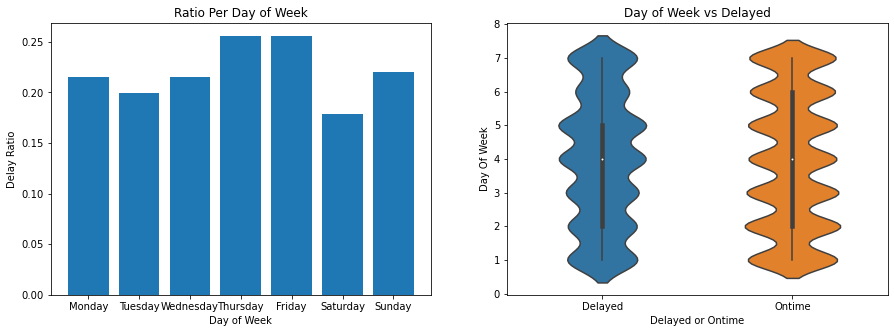

In [72]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].bar(ratio_per_day['Ratio'].index, ratio_per_day['Ratio'])
ax[0].set_ylabel('Delay Ratio')
ax[0].set_xlabel('Day of Week')
ax[0].title.set_text('Ratio Per Day of Week')

ax[1] = sns.violinplot(data = flights, x = 'Delayeds', y = 'DayOfWeek', width = 0.5)
ax[1].set_xlabel('Delayed or Ontime')
ax[1].set_ylabel('Day Of Week')
ax[1]. title.set_text('Day of Week vs Delayed')

plt.show

#### Calculating ratio per month

In [73]:
ratio_per_Month = {}
Months = ["January", "February", "March", "Abril", "May", "June", "July", "August", "September", "October", "November", "December"]

for i, month in enumerate(Months):
    monthly_delayed = flights_delay[(flights_delay['Month']==(i+1)) & (flights_delay['ArrDelay']>=15)].shape[0]
    monthly_total = flights_delay[flights_delay["Month"] == (i+1)].shape[0]
    ratio_per_Month[month] = monthly_delayed/monthly_total
    
ratio_per_Month = pd.DataFrame.from_dict(ratio_per_Month, orient = 'index', columns = ["Ratio"])
ratio_per_Month

,Ratio
January,0.233389
February,0.207530
March,0.221456
Abril,0.180683
May,0.189510
June,0.247649
July,0.263551
August,0.239001
September,0.194784
October,0.215900


#### Plottin ratio per month

<function matplotlib.pyplot.show(close=None, block=None)>

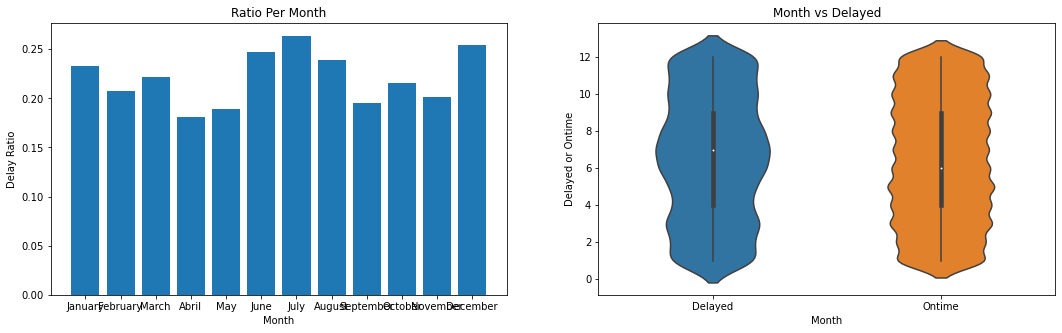

In [74]:
fig, ax = plt.subplots(1,2, figsize = (18,5))

ax[0].bar(ratio_per_Month['Ratio'].index, ratio_per_Month['Ratio'])
ax[0].set_ylabel('Delay Ratio')
ax[0].set_xlabel('Month')
ax[0].title.set_text('Ratio Per Month')

ax[1] = sns.violinplot(data = flights, x = 'Delayeds', y = 'Month', width = 0.5)
ax[1].set_ylabel('Delayed or Ontime')
ax[1].set_xlabel('Month')
ax[1].title.set_text('Month vs Delayed')


plt.show

### Passing time to hours

In [75]:
flights_delay["CRSDepTime"] = (flights_delay['CRSDepTime']/100).astype(int)
flights_delay.describe()

,Year,Month,DayofMonth,DayOfWeek,ArrDelay,CRSDepTime
count,29402.000000,29402.000000,29402.000000,29402.000000,29402.000000,29402.000000
mean,2005.503401,6.498572,15.621896,3.951058,7.466601,13.052888
std,0.499997,3.395880,8.773593,1.981416,33.412331,4.628958
min,2005.000000,1.000000,1.000000,1.000000,-63.000000,0.000000
25%,2005.000000,4.000000,8.000000,2.000000,-9.000000,9.000000
50%,2006.000000,6.000000,16.000000,4.000000,-1.000000,13.000000
75%,2006.000000,9.000000,23.000000,6.000000,12.000000,17.000000
max,2006.000000,12.000000,31.000000,7.000000,848.000000,23.000000


#### Inspecting Data Frame

In [76]:
flights_delay['CRSDepTime'].value_counts()

7     2008
8     1983
9     1970
17    1967
11    1932
6     1920
13    1895
15    1880
14    1870
12    1862
10    1857
18    1821
16    1777
19    1652
20    1199
21     935
22     366
5      240
23     195
0       45
1       19
2        7
4        2
Name: CRSDepTime, dtype: int64

#### Calculate ratio per hour

In [77]:
ratio_per_hour = {}


for i in range(0,24):
    hour_delayed = flights_delay[(flights_delay['CRSDepTime']==(i)) & (flights_delay['ArrDelay']>=15)].shape[0]
    hour_total = flights_delay[flights_delay["CRSDepTime"] == (i)].shape[0]
    ratio_per_hour[i] = hour_delayed/hour_total if hour_total !=0 else 0
    
ratio_per_hour = pd.DataFrame.from_dict(ratio_per_hour, orient = 'index', columns = ["Ratio"])
# Selecting relevant hours
ratio_per_hour = ratio_per_hour[ratio_per_hour.index >= 5]
ratio_per_hour

,Ratio
5,0.075000
6,0.109896
7,0.137450
8,0.135149
9,0.148223
10,0.201939
11,0.181677
12,0.191192
13,0.226385
14,0.239037


#### Plotting ratio per hour

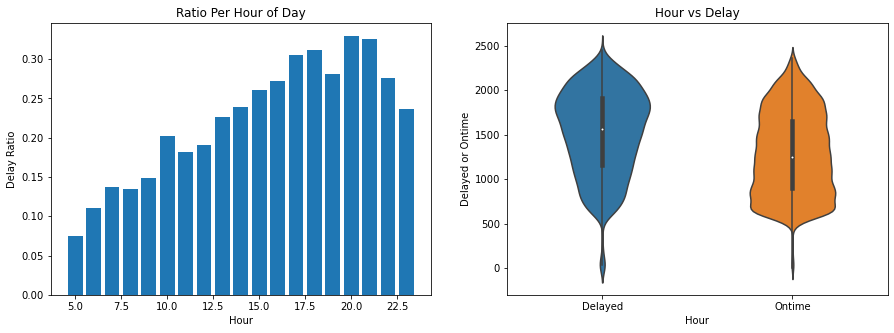

In [78]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

ax[0].bar(ratio_per_hour['Ratio'].index, ratio_per_hour['Ratio'])
ax[0].set_ylabel('Delay Ratio')
ax[0].set_xlabel('Hour')
ax[0].title.set_text('Ratio Per Hour of Day')

ax[1] = sns.violinplot(data = flights, x = 'Delayeds', y = 'DepTime', width = 0.5)
ax[1].set_ylabel('Delayed or Ontime')
ax[1].set_xlabel('Hour')
ax[1].title.set_text('Hour vs Delay')

plt.show()

## Question 2
#### Joining data frames

In [79]:
flights_planes = flights.merge(planes, how= 'left', left_on = 'TailNum', right_on = 'tailnum')
flights_planes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29464 entries, 0 to 29463
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               29464 non-null  int64   
 1   Month              29464 non-null  int64   
 2   DayofMonth         29464 non-null  int64   
 3   DayOfWeek          29464 non-null  int64   
 4   DepTime            29464 non-null  float64 
 5   CRSDepTime         29464 non-null  int64   
 6   ArrTime            29402 non-null  float64 
 7   CRSArrTime         29464 non-null  int64   
 8   UniqueCarrier      29464 non-null  object  
 9   FlightNum          29464 non-null  int64   
 10  TailNum            29464 non-null  object  
 11  ActualElapsedTime  29402 non-null  float64 
 12  CRSElapsedTime     29464 non-null  int64   
 13  AirTime            29402 non-null  float64 
 14  ArrDelay           29402 non-null  float64 
 15  DepDelay           29464 non-null  float64 
 16  Orig

#### Inspecting Data

In [80]:
flights_planes.head().T

,0,1,2,3,4
Year,2006,2005,2006,2005,2005
Month,11,12,7,4,10
DayofMonth,6,26,20,12,14
DayOfWeek,1,1,4,2,5
DepTime,926.0,741.0,2022.0,1527.0,1921.0
CRSDepTime,925,740,1830,1525,1925
ArrTime,1048.0,1133.0,2139.0,1628.0,2019.0
CRSArrTime,1114,1117,1952,1621,2031
UniqueCarrier,NW,UA,MQ,US,OO
FlightNum,152,702,4619,856,3696


In [81]:
flights_planes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29464 entries, 0 to 29463
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Year               29464 non-null  int64   
 1   Month              29464 non-null  int64   
 2   DayofMonth         29464 non-null  int64   
 3   DayOfWeek          29464 non-null  int64   
 4   DepTime            29464 non-null  float64 
 5   CRSDepTime         29464 non-null  int64   
 6   ArrTime            29402 non-null  float64 
 7   CRSArrTime         29464 non-null  int64   
 8   UniqueCarrier      29464 non-null  object  
 9   FlightNum          29464 non-null  int64   
 10  TailNum            29464 non-null  object  
 11  ActualElapsedTime  29402 non-null  float64 
 12  CRSElapsedTime     29464 non-null  int64   
 13  AirTime            29402 non-null  float64 
 14  ArrDelay           29402 non-null  float64 
 15  DepDelay           29464 non-null  float64 
 16  Orig

#### Passing year to int and cleaning NAs

In [82]:
flights_planes['year'] = pd.to_numeric(flights_planes['year'], errors='coerce')
flights_planes = flights_planes.dropna(subset=['year'])
flights_planes['year'] = flights_planes['year'].astype(int)
flights_planes['year'].describe()

count    21395.000000
mean      1993.996261
std         71.246045
min          0.000000
25%       1992.000000
50%       1999.000000
75%       2002.000000
max       2007.000000
Name: year, dtype: float64

#### Calculating plane age

In [83]:
flights_planes['Age'] = flights_planes['Year'] - flights_planes['year']
flights_planes.head()
flights_planes['Age'].describe()


count    21395.000000
mean        11.528161
std         71.245788
min         -2.000000
25%          4.000000
50%          7.000000
75%         14.000000
max       2006.000000
Name: Age, dtype: float64

#### Eliminating Outliers

In [84]:
flights_planes = flights_planes[(flights_planes['Age'] >0) & (flights_planes['Age'] <100)]
flights_planes['Age'].describe()

count    20944.000000
mean         9.191415
std          7.155358
min          1.000000
25%          4.000000
50%          7.000000
75%         14.000000
max         49.000000
Name: Age, dtype: float64

#### Plotting

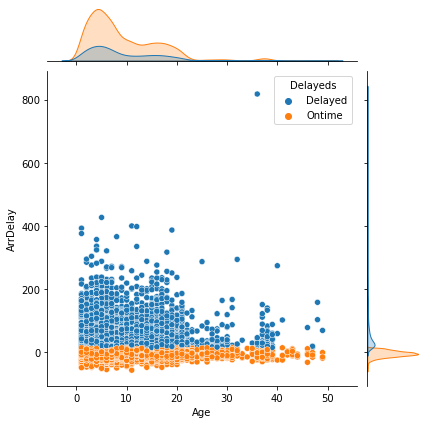

In [85]:
sns.jointplot(x='Age', y='ArrDelay', data = flights_planes, hue = 'Delayeds')
plt.show()

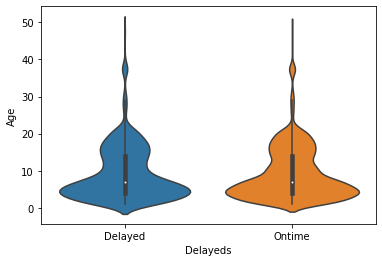

In [86]:
sns.violinplot(data = flights_planes, x= 'Delayeds', y = 'Age')
plt.show()

#### Calculating Age Ratio

In [87]:
points = flights_planes['Age'].unique()
points.sort()
points

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49],
      dtype=int64)

In [88]:
ratio_per_age = {}


for i in range(0,50):
    age_delayed = flights_planes[(flights_planes['Age']==(i)) & (flights_delay['ArrDelay']>=15)].shape[0]
    age_total = flights_planes[flights_planes["Age"] == (i)].shape[0]
    ratio_per_age[i] = age_delayed/age_total if age_total !=0 else 0
    
ratio_per_age = pd.DataFrame.from_dict(ratio_per_age, orient = 'index', columns = ["Ratio"])

ratio_per_age

C:\Users\bodeg\AppData\Local\Temp/ipykernel_9228/510092659.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  age_delayed = flights_planes[(flights_planes['Age']==(i)) & (flights_delay['ArrDelay']>=15)].shape[0]


,Ratio
0,0.000000
1,0.218991
2,0.200538
3,0.192671
4,0.218000
5,0.216780
6,0.237852
7,0.222005
8,0.211519
9,0.252703


#### Plotting Age Ratio

<function matplotlib.pyplot.show(close=None, block=None)>

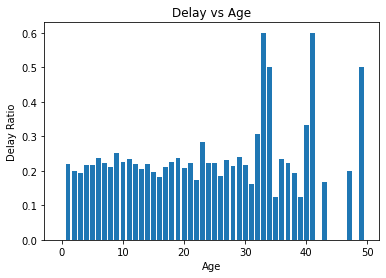

In [89]:
fig, ax = plt.subplots()

plt.bar(ratio_per_age['Ratio'].index, ratio_per_age['Ratio'])
ax.set_ylabel('Delay Ratio')
ax.set_xlabel('Age')
ax.title.set_text('Delay vs Age')
plt.show

## Question 3
#### Selecting relevant data

In [90]:
flights_people = flights[['Year', 'Origin', 'Dest']]
flights_people.head()

,Year,Origin,Dest
0,2006,MSP,SNA
1,2005,SJC,DEN
2,2006,BOS,JFK
3,2005,ILM,CLT
4,2005,SLC,SUN


#### Joining and inspecting data

In [91]:
flights_people = flights_people.merge(airports, how = "left", left_on = 'Origin', right_on = 'iata')
flights_people.head()

,Year,Origin,Dest,iata,airport,city,state,country,lat,long
0,2006,MSP,SNA,MSP,Minneapolis-St Paul Intl,Minneapolis,MN,USA,44.880547,-93.216922
1,2005,SJC,DEN,SJC,San Jose International,San Jose,CA,USA,37.361862,-121.929009
2,2006,BOS,JFK,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179
3,2005,ILM,CLT,ILM,Wilmington International,Wilmington,NC,USA,34.270611,-77.902556
4,2005,SLC,SUN,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773


#### Renaming columns and Joining data again

In [92]:
flights_people = flights_people.rename(columns = {'city': 'Origin_city'})
flights_people = flights_people.merge(airports, how = "left", left_on = 'Dest', right_on = 'iata')
flights_people = flights_people.rename(columns = {'city': 'Dest_city'})
flights_people.head()

,Year,Origin,Dest,iata_x,airport_x,Origin_city,state_x,country_x,lat_x,long_x,iata_y,airport_y,Dest_city,state_y,country_y,lat_y,long_y
0,2006,MSP,SNA,MSP,Minneapolis-St Paul Intl,Minneapolis,MN,USA,44.880547,-93.216922,SNA,John Wayne /Orange Co,Santa Ana,CA,USA,33.675659,-117.868223
1,2005,SJC,DEN,SJC,San Jose International,San Jose,CA,USA,37.361862,-121.929009,DEN,Denver Intl,Denver,CO,USA,39.858408,-104.667002
2,2006,BOS,JFK,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.364348,-71.005179,JFK,John F Kennedy Intl,New York,NY,USA,40.639751,-73.778926
3,2005,ILM,CLT,ILM,Wilmington International,Wilmington,NC,USA,34.270611,-77.902556,CLT,Charlotte/Douglas International,Charlotte,NC,USA,35.214011,-80.943126
4,2005,SLC,SUN,SLC,Salt Lake City Intl,Salt Lake City,UT,USA,40.788388,-111.977773,SUN,Friedman Memorial,Hailey,ID,USA,43.504841,-114.296590


#### Renaming columns and inspecting data

In [93]:
columns_people = ['Year','Origin','Dest', 'Origin_city', 'Dest_city']
flights_people = flights_people[columns_people]
flights_people.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29464 entries, 0 to 29463
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         29464 non-null  int64 
 1   Origin       29464 non-null  object
 2   Dest         29464 non-null  object
 3   Origin_city  29451 non-null  object
 4   Dest_city    29447 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


#### Grouping data in frequency table, calculating ratio and selecting cities with biggest difference in absolute value

In [96]:
flights_people_o = pd.crosstab(index = flights_people['Origin_city'], columns = flights_people['Year'])
flights_people_o.columns = ['2006','2005']
flights_people_o['Difference'] = (flights_people_o['2006'] - flights_people_o['2005']) 
flights_people_o['Total'] = (flights_people_o['2006'] + flights_people_o['2005']) 
flights_people_o['Ratio'] = abs((flights_people_o['Difference']*100)/flights_people_o['Total'])
flights_people_o = flights_people_o[flights_people_o['Total'] > 60]
flights_people_o = flights_people_o.sort_values(by='Ratio', ascending = False)
flights_people_o = flights_people_o.head(5)
flights_people_o

,2006,2005,Difference,Total,Ratio
Origin_city,,,,,
Manchester,34,62,-28,96,29.166667
Honolulu,77,137,-60,214,28.037383
Birmingham,47,27,20,74,27.027027
Covington,429,248,181,677,26.735598
Jacksonville,43,73,-30,116,25.862069


#### Plotting most changed origins

<function matplotlib.pyplot.show(close=None, block=None)>

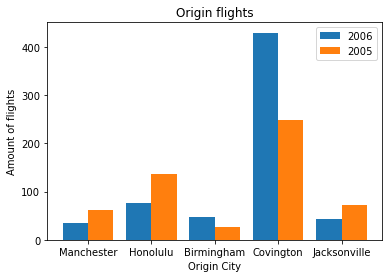

In [97]:
x_axis = np.arange(len(flights_people_o.index))

plt.bar(x_axis +0.4,flights_people_o['2006'],width=0.4, label = '2006' )
plt.bar(x_axis +0.4*2 , flights_people_o['2005'], width = 0.4, label = '2005')
plt.xticks(x_axis + 0.6, flights_people_o.index)
plt.legend()
plt.xlabel('Origin City')
plt.ylabel('Amount of flights')
plt.title('Origin flights')
plt.show

#### Again grouping data, calculating ratio and selecting biggest difference but for Destination city

In [98]:
flights_people_d = pd.crosstab(index = flights_people['Dest_city'], columns = flights_people['Year'])
flights_people_d.columns = ['2006','2005']
flights_people_d['Difference'] = (flights_people_d['2006'] - flights_people_d['2005']) 
flights_people_d['Total'] = (flights_people_d['2006'] + flights_people_d['2005']) 
flights_people_d['Ratio'] = abs((flights_people_d['Difference']*100)/flights_people_d['Total'])
flights_people_d = flights_people_d[flights_people_d['Total'] > 60]
flights_people_d = flights_people_d.sort_values(by='Ratio', ascending = False)
flights_people_d = flights_people_d.head(5)
flights_people_d

,2006,2005,Difference,Total,Ratio
Dest_city,,,,,
Covington,431,251,180,682,26.392962
Louisville,61,36,25,97,25.773196
Tulsa,56,37,19,93,20.430108
Austin,68,100,-32,168,19.047619
Honolulu,89,130,-41,219,18.721461


#### Plotting most changed destinations

<function matplotlib.pyplot.show(close=None, block=None)>

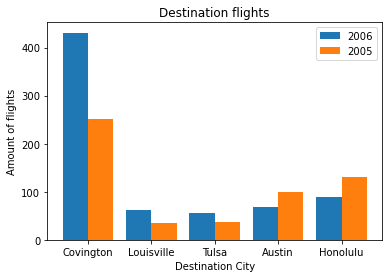

In [99]:
x_axis = np.arange(len(flights_people_d.index))

plt.bar(x_axis +0.4,flights_people_d['2006'],width=0.4, label = '2006' )
plt.bar(x_axis +0.4*2 , flights_people_d['2005'], width = 0.4, label = '2005')
plt.xticks(x_axis + 0.6, flights_people_d.index)
plt.legend()
plt.xlabel('Destination City')
plt.ylabel('Amount of flights')
plt.title('Destination flights')
plt.show

#### Grouping by most common routes for year 2005

In [101]:
flights_people_2005 = flights_people[flights_people['Year'] == 2005]
flpdf_2005 = flights_people_2005.groupby(['Origin_city','Dest_city']).agg('count').reset_index().rename(columns={'Year':'Count'})
flpdf_2005 = flpdf_2005[['Origin_city','Dest_city','Count']].sort_values(by = 'Count', ascending = False)
flpdf_2005 = flpdf_2005[:30]
flpdf_2005.head()

,Origin_city,Dest_city,Count
1941,Minneapolis,Chicago,42
2090,New York,Boston,42
404,Boston,New York,35
2097,New York,Chicago,35
672,Chicago,New York,35


#### Creating graph for network visualization year 2005

In [106]:
Gr = nx.Graph()

for i, row in flpdf_2005.iterrows():
    Gr.add_edge(row['Origin_city'],row['Dest_city'], weight = row['Count'])

#### Inspecting edges

In [107]:
Gr.edges

EdgeView([('Minneapolis', 'Chicago'), ('Chicago', 'New York'), ('Chicago', 'Detroit'), ('Chicago', 'Arlington'), ('Chicago', 'Cleveland'), ('Chicago', 'Las Vegas'), ('Chicago', 'Atlanta'), ('New York', 'Boston'), ('New York', 'Arlington'), ('New York', 'Atlanta'), ('San Diego', 'Los Angeles'), ('Los Angeles', 'Las Vegas'), ('Los Angeles', 'Phoenix'), ('Los Angeles', 'Santa Barbara'), ('Las Vegas', 'Phoenix'), ('Houston', 'Dallas'), ('Houston', 'Atlanta'), ('Atlanta', 'Dallas-Fort Worth'), ('Atlanta', 'Orlando'), ('Atlanta', 'Newark'), ('Atlanta', 'Ft. Lauderdale')])

#### Plotting network for 2005

<function matplotlib.pyplot.show(close=None, block=None)>

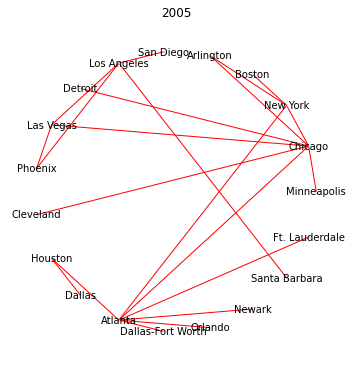

In [108]:
plt.subplots(figsize =(5,5))
pos=nx.circular_layout(Gr)
nx.draw(Gr, pos=pos, font_size = 10, node_size = 1, node_color='lightblue', edge_color ='red', alpha= 1.0)
nx.draw_networkx_labels(Gr, pos=pos, font_size = 10)
plt.tight_layout()
plt.title('2005')
plt.axis('off');
plt.show

#### Grouping by most common routes for year 2006

In [110]:
flights_people_2006 = flights_people[flights_people['Year'] == 2006]
flpdf_2006 = flights_people_2006.groupby(['Origin_city','Dest_city']).agg('count').reset_index().rename(columns={'Year':'Count'})
flpdf_2006 = flpdf_2006[['Origin_city','Dest_city','Count']].sort_values(by = 'Count', ascending = False)
flpdf_2006 = flpdf_2006[:30]
flpdf_2006.head()

,Origin_city,Dest_city,Count
2092,New York,Chicago,46
2084,New York,Boston,38
2759,San Diego,Los Angeles,38
402,Boston,New York,36
1936,Minneapolis,Chicago,34


#### Creating graph for network visualization year 2005

In [111]:
Gra = nx.Graph()

for i, row in flpdf_2006.iterrows():
    Gra.add_edge(row['Origin_city'],row['Dest_city'], weight = row['Count'])
    

#### Inspecting edges

In [113]:
Gra.edges

EdgeView([('New York', 'Chicago'), ('New York', 'Boston'), ('New York', 'Arlington'), ('New York', 'Atlanta'), ('Chicago', 'Minneapolis'), ('Chicago', 'Atlanta'), ('Chicago', 'Philadelphia'), ('Chicago', 'Dallas-Fort Worth'), ('Chicago', 'Cleveland'), ('Chicago', 'Boston'), ('Chicago', 'Kansas City'), ('Chicago', 'Denver'), ('Boston', 'Baltimore'), ('San Diego', 'Los Angeles'), ('Los Angeles', 'Las Vegas'), ('Los Angeles', 'Phoenix'), ('Dallas', 'Houston'), ('Las Vegas', 'Phoenix'), ('Lihue', 'Honolulu'), ('Honolulu', 'Kahului')])

#### Plotting network visualization

<function matplotlib.pyplot.show(close=None, block=None)>

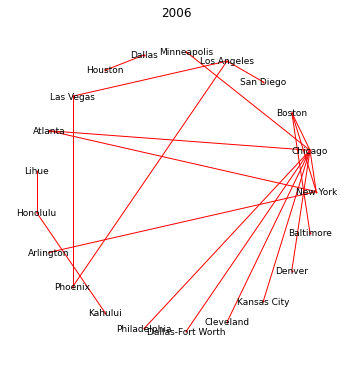

In [114]:
plt.subplots(figsize =(5,5))
pos=nx.circular_layout(Gra)
nx.draw(Gra, pos=pos, font_size = 9, node_size = 1, node_color='red', edge_color ='red', alpha= 1.0)
nx.draw_networkx_labels(Gra, pos=pos, font_size = 9)
plt.tight_layout()
plt.title('2006')
plt.axis('off');
plt.show

# Question 4

#### Subseting DF for delayed aircraft

In [115]:
flights_Late = flights[flights['Delayed'] == 1]
flights_Late.head().T

,1,2,6,13,19
Year,2005,2006,2006,2006,2006
Month,12,7,7,12,4
DayofMonth,26,20,5,8,3
DayOfWeek,1,4,3,5,1
DepTime,741.0,2022.0,1335.0,1259.0,1423.0
CRSDepTime,740,1830,1304,1220,1425
ArrTime,1133.0,2139.0,1513.0,1446.0,1520.0
CRSArrTime,1117,1952,1448,1355,1458
UniqueCarrier,UA,MQ,UA,MQ,XE
FlightNum,702,4619,1167,4737,2823


#### Calculating percentage of delayed planes with previous aircraft delay

In [116]:
flights_Late['Pre_Delay'].agg(sum)*100/flights_Late['Delayed'].agg(sum)

33.83122882660918

#### Subsetting flights with previous aircraft delay

In [118]:
flights_pre = flights[flights['LateAircraftDelay'] >= 15]

####  Calculating percentage of planes with previous aircraft delayed that where later delayed

In [119]:
flights_pre['Delayed'].agg(sum)*100/flights_pre['Delayed'].agg('count')

100.0

#### Calculating day with most delays by airport of origin

In [120]:
worst_day_o = flights.groupby(['Year','Month','DayofMonth','Origin'])['Delayed'].agg(sum).reset_index().rename(columns = {'Delayed':'Sum'})
worst_day_o = worst_day_o.sort_values(by= 'Sum', ascending = False)
worst_day_o = worst_day_o[:1]
worst_day_o

,Year,Month,DayofMonth,Origin,Sum
19358,2006,10,17,ATL,6


#### Inspecting flights from that airport that day

In [121]:
dep_worst_o = flights[(flights['Year'] == 2006) & (flights['Month'] == 10) & (flights['DayofMonth']==17) & (flights['Origin'] == 'ATL')]
dep_worst_col_o = ['Year','Month','DayofMonth','DepTime','ArrDelay','Origin','Dest','FlightNum','LateAircraftDelay','Delayed','TailNum']
dep_worst_o = dep_worst_o[dep_worst_col_o]
dep_worst_o

,Year,Month,DayofMonth,DepTime,ArrDelay,Origin,Dest,FlightNum,LateAircraftDelay,Delayed,TailNum
786,2006,10,17,1815.0,26.0,ATL,RIC,4205,0,1,N708EV
3143,2006,10,17,1711.0,25.0,ATL,XNA,4327,0,1,N920EV
5022,2006,10,17,1510.0,15.0,ATL,JAX,973,0,1,N124DE
8805,2006,10,17,1658.0,56.0,ATL,MLB,1197,52,1,N946DL
20914,2006,10,17,1434.0,49.0,ATL,CLE,4391,0,1,N699BR
25955,2006,10,17,2241.0,52.0,ATL,PBI,415,9,1,N649DL


#### #### Calculating day with most delays by airport of destination

In [122]:
flights = flights.sort_values(['Year','Month', 'DayofMonth'])
worst_day_d = flights.groupby(['Year','Month','DayofMonth','Dest'])['Delayed'].agg(sum).reset_index().rename(columns = {'Delayed':'Sum'})
worst_day_d = worst_day_d.sort_values(by= 'Sum', ascending = False)
worst_day_d = worst_day_d[:1]
worst_day_d

,Year,Month,DayofMonth,Dest,Sum
19478,2006,10,19,ATL,6


#### Inspecting flights from that airport that day

In [123]:
dep_worst_d = flights[(flights['Year'] == 2006) & (flights['Month'] == 10) & (flights['DayofMonth']==19) & (flights['Dest'] == 'ATL')]
dep_worst_col_d = ['Year','Month','DayofMonth','DepTime','ArrDelay','Origin','Dest','FlightNum','LateAircraftDelay','Delayed','TailNum']
dep_worst_d = dep_worst_d[dep_worst_col_d]
dep_worst_d

,Year,Month,DayofMonth,DepTime,ArrDelay,Origin,Dest,FlightNum,LateAircraftDelay,Delayed,TailNum
2970,2006,10,19,707.0,21.0,MIA,ATL,1653,0,1,N659DL
6734,2006,10,19,1402.0,79.0,SRQ,ATL,4840,0,1,N841AS
8899,2006,10,19,2223.0,66.0,IAH,ATL,2787,66,1,N13132
11004,2006,10,19,1154.0,35.0,DHN,ATL,4659,0,1,N632AS
19215,2006,10,19,2215.0,222.0,JAX,ATL,1442,73,1,N996DL
25661,2006,10,19,915.0,48.0,SEA,ATL,706,0,1,N143DA


#### This code was used to dinamically check for flights with similar origin/destination and similar days. Here I leave an example

In [124]:
flights[(flights['Year'] == 2006) & (flights['Month'] == 10) & (flights['DayofMonth']==19) & (flights['Dest'] == 'IAH')].T

,8824
Year,2006
Month,10
DayofMonth,19
DayOfWeek,4
DepTime,1750.0
CRSDepTime,1750
ArrTime,1933.0
CRSArrTime,1942
UniqueCarrier,XE
FlightNum,2443


# Question 5

#### Preparing data

In [126]:
flights_model = flights

#### Selecting relevant columns and sorting them in categorical /continuos

In [127]:
X = flights_model[["Year", "Month","DayOfWeek","CRSDepTime","UniqueCarrier","TailNum","Origin","Dest","Distance","LateAircraftDelay"]]
y = flights_model["Delayed"]
continuous = ["Year","Month","DayOfWeek","CRSDepTime","Distance","LateAircraftDelay"]
categorical = ["UniqueCarrier","TailNum","Origin","Dest"]

#### Piplines for data imputation and encoder for categorical values

In [128]:


continuous_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps =[
    ('imputer', SimpleImputer()),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

#### Data transformer

In [130]:
data_transformer = ColumnTransformer(
transformers=[
    ('numerical', continuous_transformer,continuous),
    ('categorical', categorical_transformer, categorical)])

#### Setting model for Logistic Regression

In [132]:
pipe_lr = Pipeline(steps = [
    ('data_transformer',data_transformer),
    ('pipe_lr', LogisticRegression(max_iter=10000))
])

#### Dividing data into train and test

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)

#### Tuning parameters and fitting model

In [135]:

param_grid = {
    'data_transformer__numerical__imputer__strategy':['mean','median'],
    'data_transformer__categorical__imputer__strategy':['constant','most_frequent']
}
grid_lr= GridSearchCV(pipe_lr, param_grid = param_grid)
grid_lr.fit(X_train, y_train)
y_predict = grid_lr.predict(X_test)

#### Printing Results

In [139]:

print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4572
           1       0.97      0.43      0.60      1321

    accuracy                           0.87      5893
   macro avg       0.91      0.71      0.76      5893
weighted avg       0.88      0.87      0.85      5893



In [111]:
y_train.value_counts()

0    18274
1     5247
Name: Delayed, dtype: int64

#### Setting model for Gradient Boosting and fitting it

In [141]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_gdp',GradientBoostingClassifier(random_state=1))])
grid_gdb = GridSearchCV(pipe_gdb, param_grid= param_grid)
grid_gdb.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('data_transformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Year',
                                                                          'Month',
                                                                          'DayOfWeek',
                                                                          'CRSDepTime',
                                                                          'Distance',
        

#### Printing Results

In [143]:
y_predicts = grid_gdb.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4572
           1       0.97      0.43      0.60      1321

    accuracy                           0.87      5893
   macro avg       0.91      0.71      0.76      5893
weighted avg       0.88      0.87      0.85      5893



#### Plotting roc curve and AUC

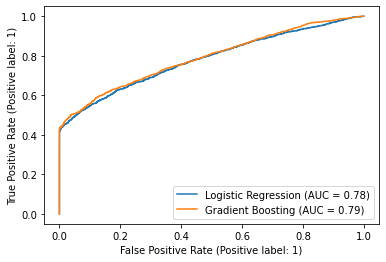

In [144]:
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax= ax, name='Logistic Regression')
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plt.show()